大谷周平, 坂東 慶太. 論文海賊サイト Sci-Hub を巡る動向と日本における利用実態. 情報の科学と技術.2018. の3章のデータ集計プログラムです。
Sci-Hubの2017年ダウンロードデータおよびImpactStory社によるUnpaywallのデータセットを利用して分析しています。
あらかじめ各データをSQLで読み込み、かつSci-Hubのデータで日本からのダウンロードのデータはDOIをキーにUnpaywallのデータセットと結合しています。
+ データベース名：data_anlytics.db
+ テーブル名：scihub,oadoi,scihubjapanoadoi

必要なライブラリのインポートおよびデータベースの読み込み

In [3]:
import pandas as pd

import numpy as np
import seaborn as sns
import folium
import sqlite3
import math
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import pickle
import matplotlib.font_manager
sns.set(font='IPAexGothic')

In [4]:
dbname = "data_anlytics.db"
conn = sqlite3.connect(dbname)
conn.row_factory = sqlite3.Row
c = conn.cursor()

In [5]:
df=pd.read_sql_query("select * from 'scihubjapanoadoi'", conn, index_col=["date"], parse_dates=["date"])

In [3]:
scihub2017=pd.read_csv("scihub-2017.statistics.tab",sep='\t',header=None, parse_dates=[0], dtype = {6:'object',7:'object' },index_col=0,chunksize=100000)


In [6]:
df.groupby(["city"]).count().sort_values(by=["is_oa"],ascending=False)

,doi,ip,cookie,country,latitude,longitude,doi:1,is_oa,data_standard,best_oa_location_url,...,best_oa_location_license,best_oa_location_evidence,title,journal_issns,journal_name,journal_is_oa,publisher,year,genre,updated
city,,,,,,,,,,,,,,,,,,,,,
Shinjuku-ku,409593,409593,409593,409593,409593,409593,320574,320574,320574,320574,...,320574,320574,320574,320574,320574,320574,320574,320574,320574,320574
Chiyoda-ku,296693,296693,296693,296693,296693,296693,236237,236237,236237,236237,...,236237,236237,236237,236237,236237,236237,236237,236237,236237,236237
Ōsaka-shi,74224,74224,74224,74224,74224,74224,56136,56136,56136,56136,...,56136,56136,56136,56136,56136,56136,56136,56136,56136,56136
Ōta-ku,27889,27889,27889,27889,27889,27889,22690,22690,22690,22690,...,22690,22690,22690,22690,22690,22690,22690,22690,22690,22690
Kyōto-shi,27297,27297,27297,27297,27297,27297,22180,22180,22180,22180,...,22180,22180,22180,22180,22180,22180,22180,22180,22180,22180
Yokohama-shi,26689,26689,26689,26689,26689,26689,20802,20802,20802,20802,...,20802,20802,20802,20802,20802,20802,20802,20802,20802,20802
Nagoya-shi,25912,25912,25912,25912,25912,25912,19815,19815,19815,19815,...,19815,19815,19815,19815,19815,19815,19815,19815,19815,19815
Fukuoka-shi,19743,19743,19743,19743,19743,19743,15297,15297,15297,15297,...,15297,15297,15297,15297,15297,15297,15297,15297,15297,15297
Tsukuba-shi,15682,15682,15682,15682,15682,15682,12485,12485,12485,12485,...,12485,12485,12485,12485,12485,12485,12485,12485,12485,12485


In [21]:
def preprocess_month(x):#countryがjapanのデータを抽出
    x=x[x[4]=="Japan"]
    return x[1]

df_japan= pd.concat((preprocess_month(r) for r in scihub2017)) 

In [16]:
df_japan[1].sort_values(ascending=True)

0
2017-05-17 07:48:00           10.1001/2012.jama.10690
2017-06-02 04:42:16           10.1001/2012.jama.10857
2017-09-06 12:19:31           10.1001/2012.jama.11132
2017-08-25 07:18:10           10.1001/2012.jama.11174
2017-06-25 09:41:37           10.1001/2012.jama.11228
2017-01-11 17:46:15           10.1001/2012.jama.11228
2017-06-23 11:32:36           10.1001/2012.jama.11274
2017-09-10 10:36:17           10.1001/2012.jama.11274
2017-09-27 13:58:47           10.1001/2012.jama.11374
2017-09-27 09:09:01           10.1001/2012.jama.11374
2017-02-07 06:10:46           10.1001/2012.jama.11580
2017-06-27 08:45:34     10.1001/2013.jamadermatol.376
2017-11-14 05:50:38     10.1001/2013.jamadermatol.406
2017-07-25 07:17:55     10.1001/2013.jamadermatol.591
2017-01-24 07:56:08    10.1001/2013.jamainternmed.829
2017-01-27 09:32:36       10.1001/2013.jamaneurol.382
2017-10-06 15:24:08       10.1001/2013.jamaneurol.505
2017-04-19 13:37:01    10.1001/2013.jamaophthalmol.91
2017-03-24 17:17:01     10

In [98]:
df_japan.groupby().count()

TypeError: You have to supply one of 'by' and 'level'

In [1]:
def sqlrow(x,doi):
    try:
        return {"doi":x["doi"],"is_oa":x["is_oa"],"data_standard":x["data_standard"],'best_oa_location_url':x['best_oa_location_url'],'best_oa_location_url_for_landing_page':x['best_oa_location_url_for_landing_page'],'best_oa_location_url_for_pdf':x['best_oa_location_url_for_pdf'],'best_oa_location_host_type':x['best_oa_location_host_type'],'best_oa_location_license':x['best_oa_location_license'],'best_oa_location_evidence':x['best_oa_location_evidence'],'title':x['title'], 'journal_issns':x[ 'journal_issns'],'journal_name':x['journal_name'],'journal_is_oa':x['journal_is_oa'],'publisher':x['publisher'],'year':x['year'],'genre':x['genre']}
    except:
        return {"doi":doi,"is_oa":"UnKnown","data_standard":"UnKnown",'best_oa_location_url':"UnKnown",'best_oa_location_url_for_landing_page':"UnKnown",'best_oa_location_url_for_pdf':"UnKnown",'best_oa_location_host_type':"UnKnown",'best_oa_location_license':"UnKnown",'best_oa_location_evidence':"UnKnown",'title':"UnKnown", 'journal_issns':"UnKnown",'journal_name':"UnKnown",'journal_is_oa':"UnKnown",'publisher':"UnKnown",'year':"UnKnown",'genre':"UnKnown"}
        

In [2]:
result=[]
count=0
query='SELECT * FROM oadoi WHERE oadoi.doi='
for i in df_japan:
    count+=1
    i=i.lower()
    c.execute('SELECT * FROM oadoi WHERE oadoi.doi=?', (i,))
    a=c.fetchone()
    result.append(sqlrow(a,i))
    if (count % 10000 == 0):
        print(count)

NameError: name 'df_japan' is not defined

In [89]:
len(result)

1271346

In [90]:
df_japan_oa=pd.DataFrame(result)

In [82]:
df_japan_oa.groupby(["is_oa","best_oa_location_host_type"]).count()

best_oa_location_evidence  \
is_oa   best_oa_location_host_type                              
                                                            3   
UnKnown UnKnown                                         16858   
f                                                      981063   
t       publisher                                      169111   
        repository                                     104311   

                                    best_oa_location_license  \
is_oa   best_oa_location_host_type                             
                                                           3   
UnKnown UnKnown                                        16858   
f                                                     981063   
t       publisher                                     169111   
        repository                                    104311   

                                    best_oa_location_url  \
is_oa   best_oa_location_host_type                         
                                                       3   
UnKnown UnKnown                                    16858   
f                                                 981063   
t       publisher                                 169111   
        repository                                104311   

                                    best_oa_location_url_for_landing_page  \
is_oa   best_oa_location_host_type                                          
                                                                        3   
UnKnown UnKnown                                                     16858   
f                                                                  981063   
t       publisher                                                  169111   
        repository                                                 104311   

                                    best_oa_location_url_for_pdf  \
is_oa   best_oa_location_host_type                                 
                                                               3   
UnKnown UnKnown                                            16858   
f                                                         981063   
t       publisher                                         169111   
        repository                                        104311   

                                    data_standard     doi   genre  \
is_oa   best_oa_location_host_type                                  
                                                3       3       3   
UnKnown UnKnown                             16858   16858   16858   
f                                          981063  981063  981063   
t       publisher                          169111  169111  169111   
        repository                         104311  104311  104311   

                                    journal_is_oa  journal_issns  \
is_oa   best_oa_location_host_type                                 
                                                3              3   
UnKnown UnKnown                             16858          16858   
f                                          981063         981063   
t       publisher                          169111         169111   
        repository                         104311         104311   

                                    journal_name  publisher   title    year  
is_oa   best_oa_location_host_type                                           
                                               3          3       3       3  
UnKnown UnKnown                            16858      16858   16858   16858  
f                                         981063     981063  981063  981063  
t       publisher                         169111     169111  169111  169111  
        repository                        104311     104311  104311  104311

In [103]:
df_japan_oa_1=df_japan_oa[["doi","publisher","title","journal_name","is_oa"]]

In [105]:
df_japan_oa_1.groupby(["doi"]).count().sort_values(by=["is_oa"],ascending=False)

,publisher,title,journal_name,is_oa
doi,,,,
10.1063/1.4922827,225,225,225,225
10.1109/cdc.2014.7040154,174,174,174,174
10.1109/imws-bio.2015.7303868,165,165,165,165
10.1038/nmat4498,133,133,133,133
10.2307/2683046,107,107,107,107
10.1001/jamapsychiatry.2017.0298,103,103,103,103
10.1006/brln.2001.2480,89,89,89,89
10.1080/01457632.2013.776453,80,80,80,80
10.1049/el.2013.0977,76,76,76,76


In [106]:
df_japan_oa_1.groupby(["publisher"]).count().sort_values(by=["is_oa"],ascending=False)

,doi,title,journal_name,is_oa
publisher,,,,
Wiley-Blackwell,194596,194596,194596,194596
Springer Nature,190292,190292,190292,190292
American Chemical Society (ACS),103099,103099,103099,103099
Elsevier BV,92790,92790,92790,92790
Informa UK Limited,71023,71023,71023,71023
Royal Society of Chemistry (RSC),52297,52297,52297,52297
IEEE,37849,37849,37849,37849
Institute of Electrical and Electronics Engineers (IEEE),32763,32763,32763,32763
Ovid Technologies (Wolters Kluwer Health),31229,31229,31229,31229


論文では名寄せ行った結果を記載

In [107]:
df_japan_oa.groupby(["year"]).count().sort_values(by=["is_oa"],ascending=False)

,best_oa_location_evidence,best_oa_location_host_type,best_oa_location_license,best_oa_location_url,best_oa_location_url_for_landing_page,best_oa_location_url_for_pdf,data_standard,doi,genre,is_oa,journal_is_oa,journal_issns,journal_name,publisher,title
year,,,,,,,,,,,,,,,
2016,161275,161275,161275,161275,161275,161275,161275,161275,161275,161275,161275,161275,161275,161275,161275
2017,146253,146253,146253,146253,146253,146253,146253,146253,146253,146253,146253,146253,146253,146253,146253
2015,109857,109857,109857,109857,109857,109857,109857,109857,109857,109857,109857,109857,109857,109857,109857
2014,92106,92106,92106,92106,92106,92106,92106,92106,92106,92106,92106,92106,92106,92106,92106
2013,67567,67567,67567,67567,67567,67567,67567,67567,67567,67567,67567,67567,67567,67567,67567
2012,57868,57868,57868,57868,57868,57868,57868,57868,57868,57868,57868,57868,57868,57868,57868
2011,51366,51366,51366,51366,51366,51366,51366,51366,51366,51366,51366,51366,51366,51366,51366
2010,42630,42630,42630,42630,42630,42630,42630,42630,42630,42630,42630,42630,42630,42630,42630
2009,39084,39084,39084,39084,39084,39084,39084,39084,39084,39084,39084,39084,39084,39084,39084


In [109]:
df

,doi,ip,cookie,country,city,latitude,longitude,doi:1,is_oa,data_standard,...,best_oa_location_license,best_oa_location_evidence,title,journal_issns,journal_name,journal_is_oa,publisher,year,genre,updated
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:20:40,10.1310/P4PC-KWCA-DVYU-H4FP,1010,1196,Japan,Shinjuku-ku,35.6938401,139.7035494,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2017-01-01 01:05:46,10.1042/bj20140312,2361,2993,Japan,Ōsaka-shi,34.6812614,135.5098009,10.1042/bj20140312,f,2,...,,,Autophagy is required and protects against apo...,"0264-6021,1470-8728",Biochemical Journal,f,Portland Press Ltd.,2014,journal-article,2017-11-16 08:52:39.292445
2017-01-01 01:11:15,10.1038/nphys1504,2491,3178,Japan,Iida-shi,35.5149777,137.8214466,10.1038/nphys1504,f,2,...,,,Isolated optical vortex knots,"1745-2473,1745-2481",Nature Physics,f,Springer Nature,2010,journal-article,2018-01-18 09:29:26.890805
2017-01-01 01:25:40,10.1097/YPG.0b013e32835d6fc6,2834,3669,Japan,Shinjuku-ku,35.6938401,139.7035494,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2017-01-01 01:31:57,10.1097/MED.0b013e32834c3c0b,2960,3857,Japan,Shinjuku-ku,35.6938401,139.7035494,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2017-01-01 01:32:11,10.1021/jp212056s,2968,3866,Japan,Sendai-shi,38.2690761,140.8704029,10.1021/jp212056s,f,2,...,,,Molecular Structure of 3-Aminopropyltriethoxys...,"1932-7447,1932-7455",The Journal of Physical Chemistry C,f,American Chemical Society (ACS),2012,journal-article,2018-01-22 00:23:55.787509
2017-01-01 01:32:59,10.1016/B978-0-12-420138-5.00005-7,2979,3886,Japan,Nerima-ku,35.7356234,139.6516577,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2017-01-01 01:41:01,10.1039/c4nr03857f,2968,3866,Japan,Sendai-shi,38.2690761,140.8704029,10.1039/c4nr03857f,f,2,...,,,Synthesis of boron and phosphorus codoped all-...,"2040-3364,2040-3372",Nanoscale,f,Royal Society of Chemistry (RSC),2014,journal-article,2018-01-18 14:14:57.671032
2017-01-01 01:43:19,10.1039/c5ra22733j,2968,3866,Japan,Sendai-shi,38.2690761,140.8704029,10.1039/c5ra22733j,f,2,...,,,Facile preparation of bridged silsesquioxane m...,2046-2069,RSC Adv.,f,Royal Society of Chemistry (RSC),2016,journal-article,2018-01-17 10:37:36.084574


In [5]:
df.shape

(1271346, 26)

In [17]:
def preprocess_month(x):#マルチインデックスを作成して、月・時間単位の分析を行う
    df_m = x.set_index([x.index.month, x.index.day,x.index.weekday_name,x.index.hour,x.index,x.index.year])
    df_m.index.names = ['month', 'day','weekday','hour','date','year1']#yearは重複するのでyear1に。
    return df_m

In [22]:
df.index = df.index.tz_localize('UTC')
df.index=df.index.tz_convert('Asia/Tokyo')
df.index.tz_localize(None) #UTCから日本時間に変換。タイムゾーンを削除してローカル日時に変換
df=preprocess_month(df)

In [24]:
df.groupby(["year1","month"]).count()

doi      ip  cookie  country    city  latitude  longitude  \
year1 month                                                                 
2017  1      101218  101218  101218   101218  101218    101218     101218   
      2       85950   85950   85950    85950   85950     85950      85950   
      3       92568   92568   92568    92568   92568     92568      92568   
      4       74345   74345   74345    74345   74345     74345      74345   
      5      114507  114507  114507   114507  114507    114507     114507   
      6      129057  129057  129057   129057  129057    129057     129057   
      7      152026  152026  152026   152026  152026    152026     152026   
      8      141780  141780  141780   141780  141780    141780     141780   
      9      129748  129748  129748   129748  129748    129748     129748   
      10      40882   40882   40882    40882   40882     40882      40882   
      11     125502  125502  125502   125502  125502    125502     125502   
      12      83339   83339   83339    83339   83339     83339      83339   
2018  1         424     424     424      424     424       424        424   

              doi:1   is_oa  data_standard   ...     best_oa_location_license  \
year1 month                                  ...                                
2017  1       80775   80775          80775   ...                        80775   
      2       66566   66566          66566   ...                        66566   
      3       71680   71680          71680   ...                        71680   
      4       58156   58156          58156   ...                        58156   
      5       89396   89396          89396   ...                        89396   
      6      103146  103146         103146   ...                       103146   
      7      118128  118128         118128   ...                       118128   
      8      110680  110680         110680   ...                       110680   
      9      103079  103079         103079   ...                       103079   
      10      32377   32377          32377   ...                        32377   
      11      98799   98799          98799   ...                        98799   
      12      62483   62483          62483   ...                        62483   
2018  1         274     274            274   ...                          274   

             best_oa_location_evidence   title  journal_issns  journal_name  \
year1 month                                                                   
2017  1                          80775   80775          80775         80775   
      2                          66566   66566          66566         66566   
      3                          71680   71680          71680         71680   
      4                          58156   58156          58156         58156   
      5                          89396   89396          89396         89396   
      6                         103146  103146         103146        103146   
      7                         118128  118128         118128        118128   
      8                         110680  110680         110680        110680   
      9                         103079  103079         103079        103079   
      10                         32377   32377          32377         32377   
      11                         98799   98799          98799         98799   
      12                         62483   62483          62483         62483   
2018  1                            274     274            274           274   

             journal_is_oa  publisher    year   genre  updated  
year1 month                                                     
2017  1              80775      80775   80775   80775    80775  
      2              66566      66566   66566   66566    66566  
      3              71680      71680   71680   71680    71680  
      4              58156      58156   58156   58156    58156  
      5              89396      89396   89396   89396    89396  
   

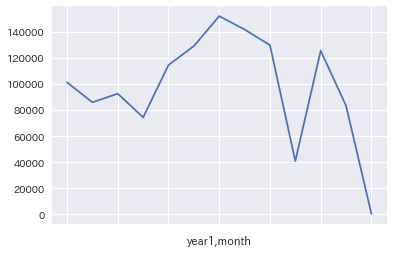

In [26]:
df.groupby(["year1","month"]).count()["doi"].plot()

ヒートマップを作成します。欠損日のある月もあるので、1年を通したデータではなく6月の4週間のログを利用しています。

In [31]:
#dfを再度読み込み
a=df["2017/06/01":"2017/06/28"]#4週間分にデータを限定
a.index = a.index.tz_localize('UTC')
a.index=a.index.tz_convert('Asia/Tokyo')
a.index.tz_localize(None) #UTCから日本時間に変換。タイムゾーンを削除してローカル日時に変換
a=preprocess_month(a)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


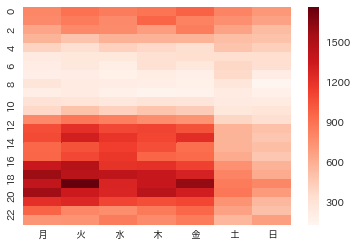

In [33]:

b=a["doi"].groupby(["weekday","hour"]).count()
c={}
counter="None"
counter_value=None
counter_list=[]
for column_name, item in b.iteritems():
    if counter != column_name[0]:
        c[counter]=counter_list
        counter_list=[]
        counter = column_name[0]
        counter_value=item
        counter_list.append(counter_value)
    else:
        counter_value=item
        counter_list.append(counter_value)
c[counter]=counter_list
del c["None"]
d=pd.DataFrame(c)
d=d.ix[:,["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]
d=d.rename(columns={"Monday":"月","Tuesday":"火","Wednesday":"水","Thursday":"木","Friday":"金","Saturday":"土","Sunday":"日"})
sns.heatmap(d,cmap="Reds")

OAの状況や出版社を調査


In [45]:
#dfを再読み込み
df.groupby(["is_oa"]).count()

,doi,ip,cookie,country,city,latitude,longitude,doi:1,data_standard,best_oa_location_url,...,best_oa_location_license,best_oa_location_evidence,title,journal_issns,journal_name,journal_is_oa,publisher,year,genre,updated
is_oa,,,,,,,,,,,,,,,,,,,,,
,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
f,776888,776888,776888,776888,776888,776888,776888,776888,776888,776888,...,776888,776888,776888,776888,776888,776888,776888,776888,776888,776888
t,218648,218648,218648,218648,218648,218648,218648,218648,218648,218648,...,218648,218648,218648,218648,218648,218648,218648,218648,218648,218648


In [53]:
df.head(5)

,doi,ip,cookie,country,city,latitude,longitude,doi:1,is_oa,data_standard,...,best_oa_location_license,best_oa_location_evidence,title,journal_issns,journal_name,journal_is_oa,publisher,year,genre,updated
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:20:40,10.1310/P4PC-KWCA-DVYU-H4FP,1010,1196,Japan,Shinjuku-ku,35.6938401,139.7035494,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2017-01-01 01:05:46,10.1042/bj20140312,2361,2993,Japan,Ōsaka-shi,34.6812614,135.5098009,10.1042/bj20140312,f,2,...,,,Autophagy is required and protects against apo...,"0264-6021,1470-8728",Biochemical Journal,f,Portland Press Ltd.,2014,journal-article,2017-11-16 08:52:39.292445
2017-01-01 01:11:15,10.1038/nphys1504,2491,3178,Japan,Iida-shi,35.5149777,137.8214466,10.1038/nphys1504,f,2,...,,,Isolated optical vortex knots,"1745-2473,1745-2481",Nature Physics,f,Springer Nature,2010,journal-article,2018-01-18 09:29:26.890805
2017-01-01 01:25:40,10.1097/YPG.0b013e32835d6fc6,2834,3669,Japan,Shinjuku-ku,35.6938401,139.7035494,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2017-01-01 01:31:57,10.1097/MED.0b013e32834c3c0b,2960,3857,Japan,Shinjuku-ku,35.6938401,139.7035494,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [40]:
df.columns

Index(['doi', 'ip', 'cookie', 'country', 'city', 'latitude', 'longitude',
       'doi:1', 'is_oa', 'data_standard', 'best_oa_location_url',
       'best_oa_location_url_for_landing_page', 'best_oa_location_url_for_pdf',
       'best_oa_location_host_type', 'best_oa_location_version',
       'best_oa_location_license', 'best_oa_location_evidence', 'title',
       'journal_issns', 'journal_name', 'journal_is_oa', 'publisher', 'year',
       'genre', 'updated'],
      dtype='object')

In [4]:
df_cookie=df.groupby(["cookie"]).count()

In [10]:
df_cookie["doi"].describe()

count    357464.000000
mean          3.556571
std          32.610775
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        6831.000000
Name: doi, dtype: float64

//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


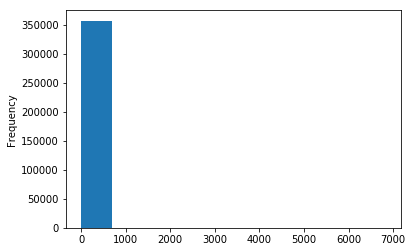

In [13]:
df_cookie["doi"].plot.hist()

In [7]:
print(df_cookie.query("doi==1").shape)
print(df_cookie.query("doi>1 and doi <=10").shape)
print(df_cookie.query("doi>10 and doi <= 100").shape)
print(df_cookie.query("doi>100 and doi <= 1000").shape)
print(df_cookie.query("doi>1000 and doi < 10000").shape)

(286090, 25)
(54372, 25)
(15776, 25)
(1189, 25)
(37, 25)


//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


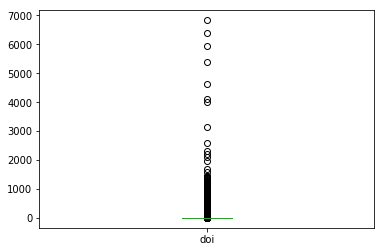

In [14]:
df_cookie["doi"].plot.box()

(array([  1.46385032e-03,   1.88410376e-07,   4.09587775e-08,
          1.63835110e-08,   4.09587775e-09,   4.09587775e-09,
          8.19175550e-09,   4.09587775e-09,   4.09587775e-09,
          8.19175550e-09]),
 array([  1.00000000e+00,   6.84000000e+02,   1.36700000e+03,
          2.05000000e+03,   2.73300000e+03,   3.41600000e+03,
          4.09900000e+03,   4.78200000e+03,   5.46500000e+03,
          6.14800000e+03,   6.83100000e+03]),
 <a list of 10 Patch objects>)

//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


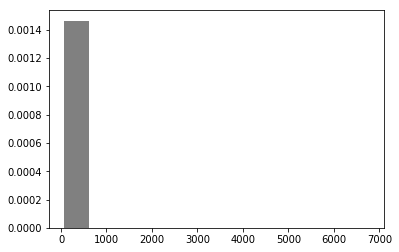

In [19]:
plt.hist(df_cookie["doi"], color='gray', rwidth=.8)


//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


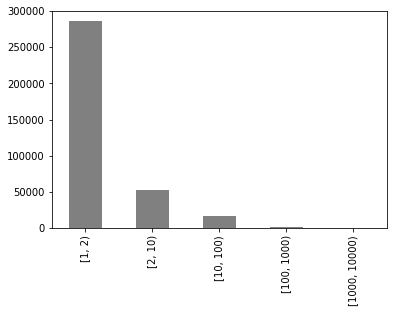

In [36]:
x=[1,2,10,100,1000,10000]
pd.cut(df_cookie["doi"], x, right=False).value_counts().sort_index().plot.bar(color='gray')

([<matplotlib.axis.XTick at 0x20460b14e0>,
 <a list of 6 Text xticklabel objects>)

//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


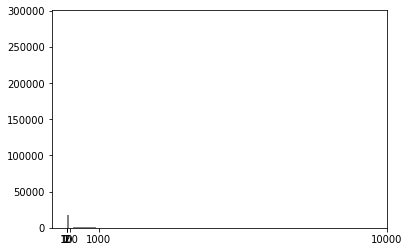

In [26]:
plt.hist(df_cookie["doi"] ,x, color='gray', rwidth=.8)
plt.xticks(x)

In [29]:
286090/357464

0.80033234115883

In [30]:
df_cookie.query("doi>=1000")

,date,doi,ip,country,city,latitude,longitude,doi:1,is_oa,data_standard,...,best_oa_location_license,best_oa_location_evidence,title,journal_issns,journal_name,journal_is_oa,publisher,year,genre,updated
cookie,,,,,,,,,,,,,,,,,,,,,
11313012,1393,1393,1393,1393,1393,1393,1393,1146,1146,1146,...,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146
117300,1070,1070,1070,1070,1070,1070,1070,865,865,865,...,865,865,865,865,865,865,865,865,865,865
1197999,1433,1433,1433,1433,1433,1433,1433,1208,1208,1208,...,1208,1208,1208,1208,1208,1208,1208,1208,1208,1208
1248026,1389,1389,1389,1389,1389,1389,1389,1235,1235,1235,...,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235
1318147,1145,1145,1145,1145,1145,1145,1145,967,967,967,...,967,967,967,967,967,967,967,967,967,967
1321734,1002,1002,1002,1002,1002,1002,1002,902,902,902,...,902,902,902,902,902,902,902,902,902,902
1338458,1952,1952,1952,1952,1952,1952,1952,1540,1540,1540,...,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540
13664376,1116,1116,1116,1116,1116,1116,1116,939,939,939,...,939,939,939,939,939,939,939,939,939,939
1521364,5394,5394,5394,5394,5394,5394,5394,3509,3509,3509,...,3509,3509,3509,3509,3509,3509,3509,3509,3509,3509


//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


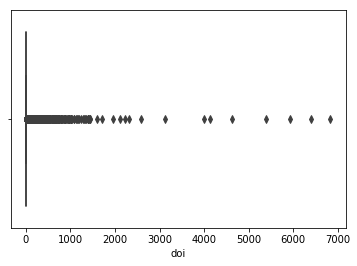

In [34]:
sns.boxplot(df_cookie["doi"])

In [110]:
df

,doi,ip,cookie,country,city,latitude,longitude,doi:1,is_oa,data_standard,...,best_oa_location_license,best_oa_location_evidence,title,journal_issns,journal_name,journal_is_oa,publisher,year,genre,updated
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:20:40,10.1310/P4PC-KWCA-DVYU-H4FP,1010,1196,Japan,Shinjuku-ku,35.6938401,139.7035494,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2017-01-01 01:05:46,10.1042/bj20140312,2361,2993,Japan,Ōsaka-shi,34.6812614,135.5098009,10.1042/bj20140312,f,2,...,,,Autophagy is required and protects against apo...,"0264-6021,1470-8728",Biochemical Journal,f,Portland Press Ltd.,2014,journal-article,2017-11-16 08:52:39.292445
2017-01-01 01:11:15,10.1038/nphys1504,2491,3178,Japan,Iida-shi,35.5149777,137.8214466,10.1038/nphys1504,f,2,...,,,Isolated optical vortex knots,"1745-2473,1745-2481",Nature Physics,f,Springer Nature,2010,journal-article,2018-01-18 09:29:26.890805
2017-01-01 01:25:40,10.1097/YPG.0b013e32835d6fc6,2834,3669,Japan,Shinjuku-ku,35.6938401,139.7035494,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2017-01-01 01:31:57,10.1097/MED.0b013e32834c3c0b,2960,3857,Japan,Shinjuku-ku,35.6938401,139.7035494,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2017-01-01 01:32:11,10.1021/jp212056s,2968,3866,Japan,Sendai-shi,38.2690761,140.8704029,10.1021/jp212056s,f,2,...,,,Molecular Structure of 3-Aminopropyltriethoxys...,"1932-7447,1932-7455",The Journal of Physical Chemistry C,f,American Chemical Society (ACS),2012,journal-article,2018-01-22 00:23:55.787509
2017-01-01 01:32:59,10.1016/B978-0-12-420138-5.00005-7,2979,3886,Japan,Nerima-ku,35.7356234,139.6516577,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2017-01-01 01:41:01,10.1039/c4nr03857f,2968,3866,Japan,Sendai-shi,38.2690761,140.8704029,10.1039/c4nr03857f,f,2,...,,,Synthesis of boron and phosphorus codoped all-...,"2040-3364,2040-3372",Nanoscale,f,Royal Society of Chemistry (RSC),2014,journal-article,2018-01-18 14:14:57.671032
2017-01-01 01:43:19,10.1039/c5ra22733j,2968,3866,Japan,Sendai-shi,38.2690761,140.8704029,10.1039/c5ra22733j,f,2,...,,,Facile preparation of bridged silsesquioxane m...,2046-2069,RSC Adv.,f,Royal Society of Chemistry (RSC),2016,journal-article,2018-01-17 10:37:36.084574


In [8]:
df_map=df[["doi","latitude","longitude"]]

In [9]:
df_map=df_map.groupby(["latitude","longitude"],as_index=False).count()

In [10]:
df_map=df_map

<bound method DataFrame.dropna of        latitude    longitude   doi
0    24.3406606  124.1555804    36
1      24.80549  125.2811486     9
2    25.9459514  131.2989939     7
3    26.1235841  127.6658145     9
4    26.1444519  127.7669666   531
5    26.1581804  127.7186873     2
6    26.1610061   127.668944     2
7    26.1911191  127.7285514  1055
8    26.1995771   127.754768     1
9    26.2123124  127.6791568   482
10   26.2458164  127.7217987   138
11   26.2673794  127.7911255     3
12   26.2815751  127.7786343   387
13   26.3011098  127.7931492     3
14   26.3201191  127.7637755    34
15   26.3344266  127.8055832   726
16   26.3960554  127.7442772   100
17   26.4270624  127.8290812   433
18   26.4561262  127.9259364     5
19   26.4974995  127.8535573   905
20   26.5915465  127.9773162    21
21   26.6825769  127.9726275     4
22    26.745635  128.1779073     1
23   27.0943662  142.1919184   100
24   31.4645389  131.2283032     1
25   31.5965535  130.5571158  4856
26   31.6019319  131.

In [6]:
m = folium.Map(location=[35.55, 139.49], zoom_start=5)

In [5]:
m

In [11]:
for i, r in df_map.iterrows():
    if r['latitude'] != 'N/A':
        folium.CircleMarker(location=[float(r['latitude']), float(r['longitude'])],radius=math.sqrt(math.sqrt(r['doi']))).add_to(m)#円の大きさの調整のため、4重根を
m

In [12]:
m.save('japan_scihub_2017.html')

In [25]:
scihub201512=pd.read_csv("dec2015.tab",sep='\t',header=None, parse_dates=[0], dtype = {6:'object',7:'object' },index_col=0)

In [28]:
scihub201511=pd.read_csv("nov2015.tab",sep='\t',header=None, parse_dates=[0], dtype = {6:'object',7:'object' },index_col=0)

In [29]:
scihub201510=pd.read_csv("oct2015.tab",sep='\t',header=None, parse_dates=[0], dtype = {6:'object',7:'object' },index_col=0)

In [30]:
scihub201601=pd.read_csv("jan2016.tab",sep='\t',header=None, parse_dates=[0], dtype = {6:'object',7:'object' },index_col=0)

In [31]:
scihub201602=pd.read_csv("feb2016.tab",sep='\t',header=None, parse_dates=[0], dtype = {6:'object',7:'object' },index_col=0)

In [35]:
scihub201509=pd.read_csv("sep2015.tab",sep='\t',header=None, parse_dates=[0], dtype = {6:'object',7:'object' },index_col=0)

In [32]:
df_2015=scihub201510.append(scihub201511)

In [33]:
df_2015=df_2015.append(scihub201512)
df_2015=df_2015.append(scihub201601)
df_2015=df_2015.append(scihub201602)

In [36]:
df_2015=df_2015.append(scihub201509)

In [102]:
df_2015.shape

(27819966, 5)

In [101]:
df_2015.groupby(by=3).count().to_csv("2015world.csv")


In [41]:
df_2015_japan=df_2015[df_2015[3]=="Japan"]

In [42]:
df_2015_japan

,1,2,3,4,5
0,,,,,
2015-10-01 00:13:01,10.2307/1251760,56ed2b09cd141,Japan,Shinjuku-ku,"35.6938401,139.7035494"
2015-10-01 00:47:48,10.1053/j.seminhematol.2014.08.001,56ed2b057ae8b,Japan,Shinjuku-ku,"35.6938401,139.7035494"
2015-10-01 00:47:51,10.1016/j.beha.2014.11.004,56ed2b0592dd0,Japan,Shinjuku-ku,"35.6938401,139.7035494"
2015-10-01 01:14:30,10.1016/j.cell.2015.03.053,56ed2b898d7a7,Japan,Shinjuku-ku,"35.6938401,139.7035494"
2015-10-01 01:15:42,10.1016/j.cell.2014.12.021,56ed2b898d7a7,Japan,Shinjuku-ku,"35.6938401,139.7035494"
2015-10-01 01:44:58,10.3109/02699206.2015.1079247,56ed2b9071f22,Japan,Kyōto-shi,"34.9876552,135.7555334"
2015-10-01 01:48:14,10.1061/40744(154)215,56ed9fe409618,Japan,Kure-shi,"34.2492541,132.5658045"
2015-10-01 02:05:30,10.1016/0014-3057(94)90129-5,56ed2b0c38fe8,Japan,Nagaoka-shi,"37.4462652,138.8512772"
2015-10-01 02:11:11,10.1016/j.ijfoodmicro.2008.06.017,56ed2bbf75fd8,Japan,Suzaka-shi,"36.6510973,138.3071917"


In [70]:
df_2015_japan_geo=df_2015_japan.groupby(by=5,as_index=False).count()

In [75]:
df_2015_japan_geo[[5,1]]

,5,1
0,"26.1235841,127.6658145",3
1,"26.1444519,127.7669666",16
2,"26.1610061,127.668944",7
3,"26.1911191,127.7285514",129
4,"26.2123124,127.6791568",48
5,"26.2458164,127.7217987",5
6,"26.2815751,127.7786343",11
7,"26.3344266,127.8055832",73
8,"26.4270624,127.8290812",33
9,"26.4974995,127.8535573",144


In [88]:
for i in df_2015_japan_geo[[5,1]].iterrows():
    a=i[1][5].split(",")
    b=geolocation(str(a[1]),str(a[0]))
    print(b[0],b[1],i[1][1])
    time.sleep(1)

沖縄県 糸満市 3
沖縄県 南城市 16
沖縄県 豊見城市 7
沖縄県 島尻郡南風原町 129
沖縄県 那覇市 48
沖縄県 浦添市 5
沖縄県 宜野湾市 11
沖縄県 沖縄市 73
沖縄県 うるま市 33
沖縄県 国頭郡恩納村 144
東京都 小笠原村 8
鹿児島県 鹿児島市 160
宮崎県 宮崎市 45
宮崎県 西都市 10
熊本県 人吉市 2
熊本県 八代市 9
長崎県 長崎市 2119
熊本県 熊本市中央区 1284
長崎県 大村市 23
長崎県 佐世保市 2
大分県 大分市 10
佐賀県 佐賀市 175
大分県 別府市 382
福岡県 久留米市 113
佐賀県 鳥栖市 18
佐賀県 唐津市 2
福岡県 太宰府市 88
福岡県 大野城市 1
福岡県 糸島市 91
高知県 高知市 424
福岡県 福岡市博多区 3305
福岡県 田川市 22
福岡県 飯塚市 4
和歌山県 田辺市 4
福岡県 古賀市 13
愛媛県 伊予市 1
愛媛県 松山市 366
福岡県 北九州市小倉南区 655
愛媛県 西条市 5
徳島県 阿南市 11
山口県 宇部市 1459
山口県 下関市 3
愛媛県 新居浜市 2
徳島県 小松島市 6
山口県 防府市 2
山口県 周南市 1
愛媛県 今治市 26
徳島県 徳島市 287
香川県 観音寺市 387
和歌山県 海南市 3
山口県 岩国市 20
徳島県 鳴門市 35
山口県 山口市 7
和歌山県 和歌山市 36
広島県 呉市 15
香川県 坂出市 167
香川県 高松市 187
広島県 廿日市市 1
広島県 広島市中区 1545
広島県 尾道市 8
大阪府 岸和田市 17
奈良県 御所市 11
広島県 福山市 50
大阪府 富田林市 56
大阪府 高石市 11
奈良県 宇陀市 22
大阪府 堺市美原区 47
奈良県 香芝市 7
大阪府 堺市北区 55
大阪府 堺市堺区 63
大阪府 松原市 9
岡山県 倉敷市 61
大阪府 八尾市 12
三重県 名張市 1
兵庫県 明石市 17
岡山県 岡山市北区 2468
岡山県 総社市 9
大阪府 東大阪市 76
大阪府 大阪市中央区 4301
奈良県 奈良市 861
大阪府 大阪市中央区 20
奈良県 生駒市 58
兵庫県 神戸市中央区 1384
静岡県 浜松市中区 1690
三重県 津市 128
兵庫

In [85]:
for i in df_2015_japan_geo[[5,1]].iterrows():
    print(i[1][5])

26.1235841,127.6658145
26.1444519,127.7669666
26.1610061,127.668944
26.1911191,127.7285514
26.2123124,127.6791568
26.2458164,127.7217987
26.2815751,127.7786343
26.3344266,127.8055832
26.4270624,127.8290812
26.4974995,127.8535573
27.0943662,142.1919184
31.5965535,130.5571158
31.9076736,131.4202411
32.1085538,131.4012025
32.2100405,130.7625544
32.5074371,130.6017433
32.7502856,129.877667
32.8032254,130.7081911
32.9000901,129.9581416
33.1799153,129.7151101
33.2395578,131.609272
33.263482,130.3008576
33.28462,131.4912138
33.3192865,130.5083735
33.3777547,130.506258
33.4501738,129.9681335
33.5127991,130.5239064
33.536307,130.478641
33.5573203,130.195555
33.5595867,133.5292788
33.5913576,130.4148783
33.6389822,130.8062975
33.6459075,130.6915113
33.7280335,135.377768
33.7287865,130.4699872
33.7574293,132.7037292
33.8391574,132.7655752
33.8465246,130.8848111
33.9195105,133.1811697
33.9217479,134.6594685
33.9515087,131.2467858
33.9578307,130.941459
33.9602895,133.2833512
34.0047114,134.5906739


In [78]:
def geolocation(geo1,geo2):
    base='http://geoapi.heartrails.com/api/json?method=searchByGeoLocation&x='+geo1+"&y="+geo2
    r = requests.get(base)
    data = r.json()
    return [data["response"]["location"][0]["prefecture"],data["response"]["location"][0]["city"]]

In [62]:
import requests
import json
import time

In [61]:
geolocation("127.8535573","26.3344266")

['沖縄県', 'うるま市']